Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.

In [63]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
Airlines=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [66]:
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


EDA

In [67]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [68]:
Airlines.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [69]:
Airlines.shape

(3999, 12)

In [70]:
Airlines.size

47988

In [71]:
Airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [72]:
Airlines.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [73]:
#There is no null value in dataset

In [74]:
Airlines.duplicated().sum()

0

In [75]:
#There is no duplicate value in dataset

Data Preparation

In [76]:
Airlines.drop('ID#', axis = 1,inplace=True)

In [77]:
Airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scalar = MinMaxScaler()
scalar=scalar.fit_transform(Airlines)

In [80]:
df= pd.DataFrame(scalar,columns=Airlines.columns)

In [81]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [82]:
import scipy.cluster.hierarchy as sch

Hierarchical Clustering

In [83]:
#Single Linkage

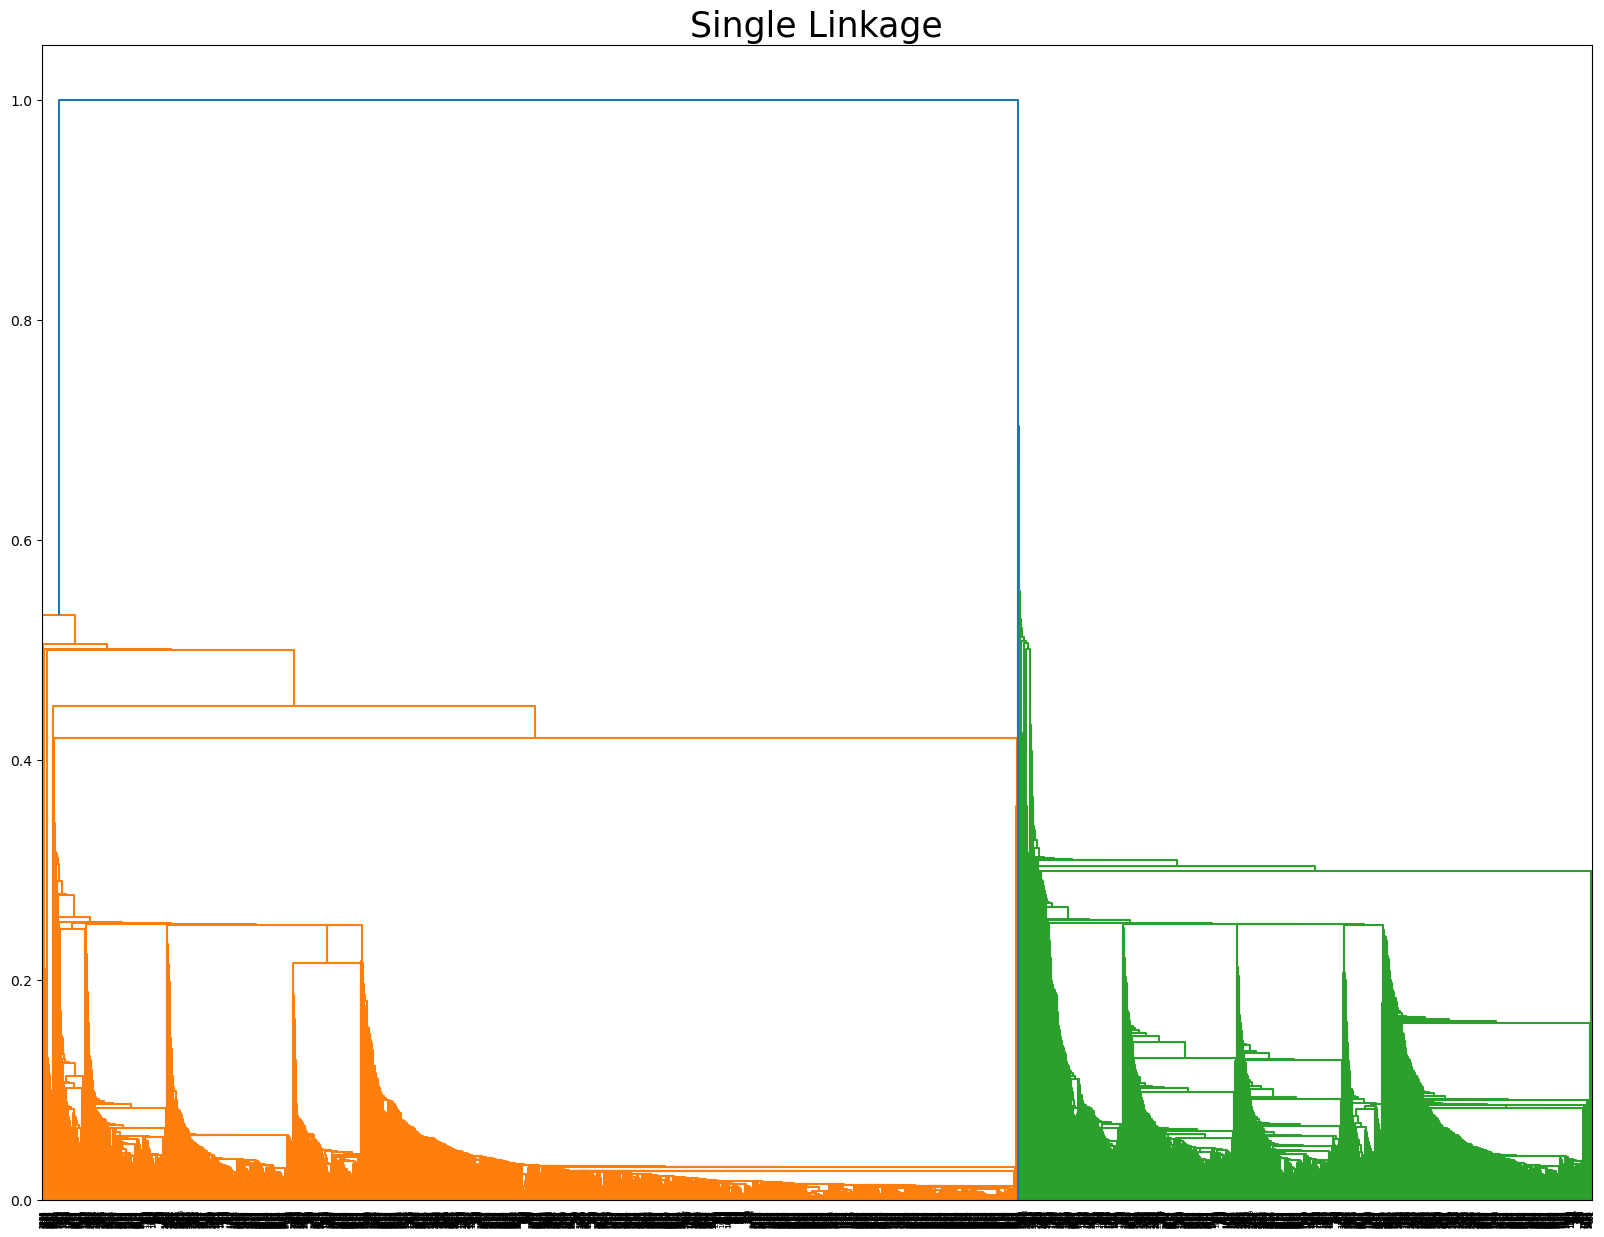

In [84]:
fig=plt.figure(figsize = (20,15))
dendogram=sch.dendrogram(sch.linkage(df, method = 'single'))
plt.title('Single Linkage',size=25);

In [85]:
from sklearn.cluster import AgglomerativeClustering

In [86]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single')
y_hc=hc.fit_predict(df)

In [87]:
Airlines['Cluster']=y_hc

In [88]:
Airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [89]:
Airlines['Cluster'].value_counts()

0    2518
1    1478
4       1
3       1
2       1
Name: Cluster, dtype: int64

In [90]:
#Complete Linkage 

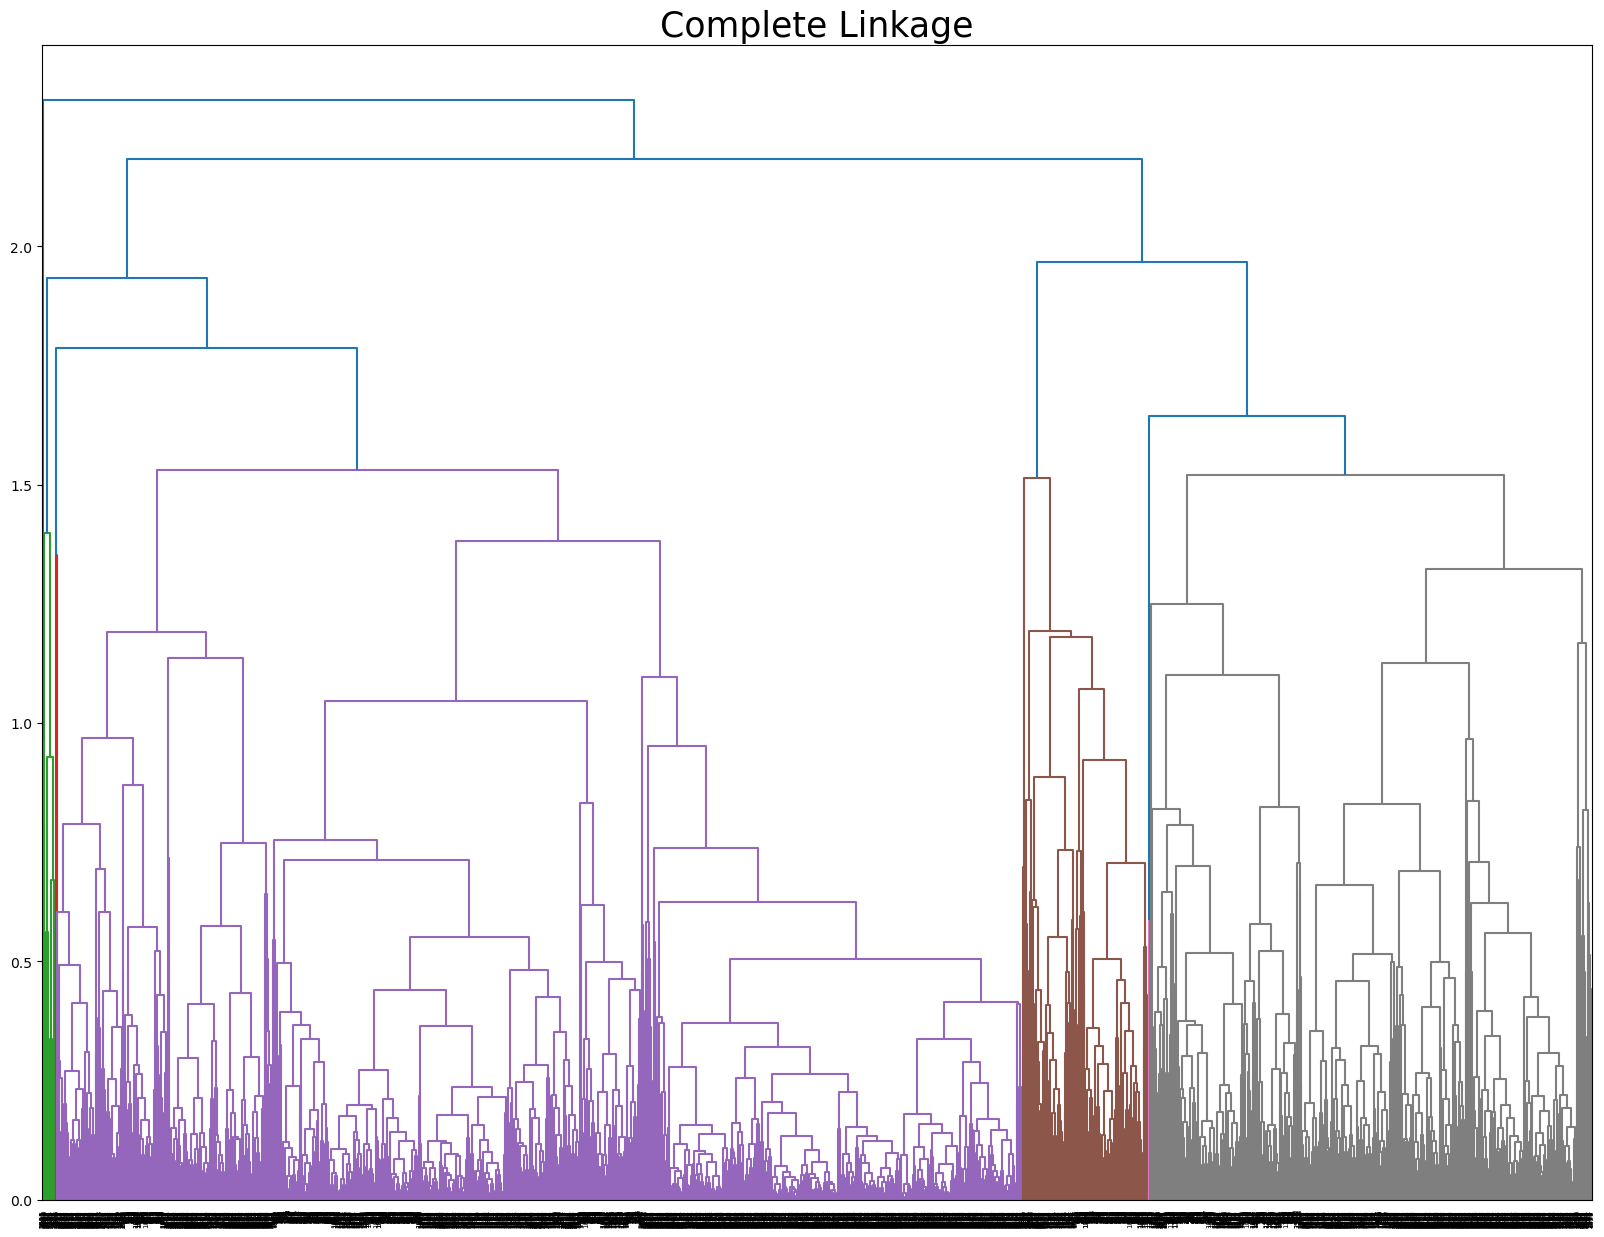

In [91]:
fig=plt.figure(figsize = (20,15))
dendogram=sch.dendrogram(sch.linkage(df, method = 'complete'))
plt.title('Complete Linkage',size=25);

In [92]:
hc1=AgglomerativeClustering(n_clusters = 5,affinity='euclidean',linkage='complete')

In [93]:
y_hc1=hc1.fit_predict(df)

In [94]:
Airlines['Cluster']=y_hc1
Airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [95]:
Airlines['Cluster'].value_counts()

0    2495
2    1144
1     325
4      31
3       4
Name: Cluster, dtype: int64

K-Means Clustering

In [96]:
from sklearn.cluster import KMeans

In [97]:
sse=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=13)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'

In [46]:
from sklearn.cluster import DBSCAN

In [47]:
dbscan=DBSCAN(eps = 0.9,min_samples = 5)
dbscan.fit(df)

DBSCAN(eps=0.9)

In [48]:
pred=dbscan.fit_predict(df)

In [49]:
Airlines['Cluster']=pred
Airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [51]:
from sklearn import metrics

In [53]:
silhouette_single=(metrics.silhouette_score(df,y_hc))
silhouette_single

0.48005487141025094

In [56]:
silhouette_complete=(metrics.silhouette_score(df,y_hc1))
silhouette_complete

0.4167248248554338

In [57]:
silhouette_DBSCAN=(metrics.silhouette_score(df,pred))
silhouette_DBSCAN

0.535930510919477

In [59]:
table={'Clustering Models':['HC Single Linkage','HC Complete Linkage','DBSCAN'],'Silhouette Score':[silhouette_single,silhouette_complete,silhouette_DBSCAN]}
table=pd.DataFrame(table)

In [60]:
table

,Clustering Models,Silhouette Score
0,HC Single Linkage,0.480055
1,HC Complete Linkage,0.416725
2,DBSCAN,0.535931
